In [3]:
# Importng the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values # converted into marix (independent variable X , NOT THE DEPENET variable y)
y = dataset.iloc[:, 2].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [6]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()'

In [7]:
# Fitting the Regression Model(Decision tree model) to the dataset
# Create your regressor here
from sklearn.tree import DecisionTreeRegressor
d = DecisionTreeRegressor()
d.fit(X,y)

DecisionTreeRegressor()

In [8]:
y_pred = d.predict(np.array([[6.5]]))
y_pred

array([150000.])

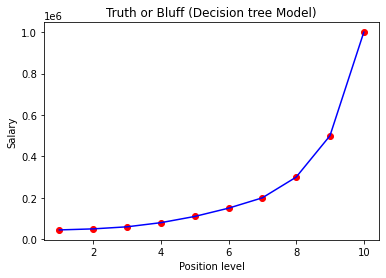

In [9]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, d.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision tree Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

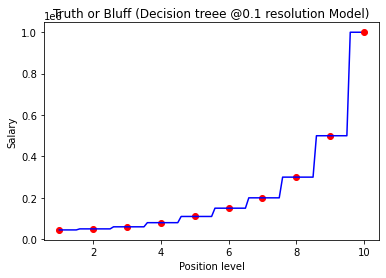

In [10]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, d.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision treee @0.1 resolution Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

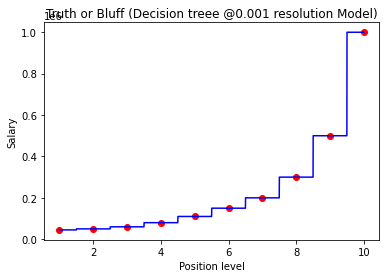

In [11]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, d.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision treee @0.001 resolution Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
y_pred = d.predict(np.array([[1.5]]))
y_pred

array([45000.])

In [13]:
import seaborn as sns
import statsmodels.api as sm

In [14]:
regressor_ols = sm.OLS(y,d.predict(X)).fit()
regressor_ols.summary()

C:\Users\rashm\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.672e+32
Date:                Sat, 23 Jan 2021   Prob (F-statistic):                   5.04e-142
Time:                        12:28:19   Log-Likelihood:                          217.38
No. Observations:                  10   AIC:                                     -432.8
Df Residuals:                       9   BIC:                                     -432.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   7.73e-17   1.29e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       14.174   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.083
Skew:                           1.784   Prob(JB):                       0.0290
Kurtosis:                       5.065   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from sklearn.metrics import mean_squared_error , r2_score

In [16]:
mean_squared_error(y,d.predict(X))

0.0

In [17]:
r2_score(y,d.predict(X))

1.0

# Final conclusion: This model says it is trap as r_square value is showing 1, which is never possible. so will go with Random_forest_model.
